# Proyecto colaborativo: Reconocimiento de objetos con TensorFlow

## Objetivo 

Construir, entrenar y evaluar un modelo de visi√≥n que identifique objetos del entorno grabados por los estudiantes,utilizando redes convolucionales, autoencoders y clasificadores.

## Realiz√≥:
Andr√©s Felipe Pulido Castro - C√≥digo: 20242695004

## Obtenci√≥n de frames processed

### Importar librer√≠as y configurar rutas

In [1]:
import os
import cv2
from tqdm import tqdm

# Definir rutas principales
BASE_DIR = os.path.dirname(os.getcwd())  # subir un nivel (no dos)
RAW_DIR = os.path.join(BASE_DIR, "raw")
PROCESSED_DIR = os.path.join(BASE_DIR, "processed")


# Crear carpeta processed si no existe
os.makedirs(PROCESSED_DIR, exist_ok=True)

print("BASE_DIR:", BASE_DIR)
print("RAW_DIR:", RAW_DIR)
print("Videos detectados:", os.listdir(RAW_DIR))


BASE_DIR: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon
RAW_DIR: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\raw
Videos detectados: ['20172167090_cpu.mp4', '20172167090_mesa.mp4', '20172167090_mouse.mp4', '20172167090_nada.mp4', '20172167090_pantalla.mp4', '20172167090_silla.mp4', '20172167090_teclado.mp4', '20241196002_cpu.mp4', '20241196002_mesa.mp4', '20241196002_mouse.mp4', '20241196002_pantalla.mp4', '20241196002_ruido.mp4', '20241196002_silla.mp4', '20241196002_teclado.mp4', '20241695014_cpu.mp4', '20241695014_mesa.mp4', '20241695014_mouse.mp4', '20241695014_pantalla.mp4', '20241695014_silla.mp4', '20241695014_teclado.mp4', '20242595003_cpu.mp4', '20242595003_mesa.mp4', '20242595003_mouse.mp4', '20242595003_pantalla.mp4', '20242595003_silla.mp4', '20242595003_teclado.mp4', '20242595004_cpu.MOV', '20242595004_mesa.MOV', '20242595004_mouse.MOV', '20242595004_pantalla.MOV'

Se realiza la importaci√≥n de las librer√≠as b√°sicas para el tratamiento de directorios junto a la extracci√≥n de frames de im√°genes con OpenCV. 

### Funci√≥n para extraer frames

In [2]:
def extract_frames(video_path, output_folder, step=10, min_frames=8):
    """
    Extrae un frame cada 'step' cuadros y asegura al menos 'min_frames' im√°genes.
    Los archivos se numeran desde 0001.
    """
    import math
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    saved = 0
    frames_to_save = []

    # Calcular √≠ndices de frames a guardar
    for i in range(0, frame_count, step):
        frames_to_save.append(i)
    # Asegurar m√≠nimo de frames
    if len(frames_to_save) < min_frames:
        # Generar √≠ndices espaciados uniformemente
        frames_to_save = [
            int(round(i * (frame_count - 1) / (min_frames - 1)))
            for i in range(min_frames)
        ]

    # Extraer y guardar frames seleccionados
    current_frame = 0
    idx_to_save = set(frames_to_save)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if current_frame in idx_to_save:
            frame_name = f"{os.path.basename(video_path).split('.')[0]}_{saved+1:04}.jpg"
            cv2.imwrite(os.path.join(output_folder, frame_name), frame)
            saved += 1
        current_frame += 1

    cap.release()
    print(f"{os.path.basename(video_path)} ‚Üí {saved} frames guardados en {output_folder}")


SSe realiza una funci√≥n para rescatar los videos relacionados a mi c√≥digo *20242965004*, asegurando que por video se extraigan 8 frames, con pasos entre 10 y 15.  

### Procesar solo los siete videos espec√≠ficos

In [3]:
videos_objetivo = [
    "20242695004_cpu.mp4",
    "20242695004_mesa.mp4",
    "20242695004_pantalla.mp4",
    "20242695004_mouse.mp4",
    "20242695004_nada.mp4",
    "20242695004_silla.mp4",
    "20242695004_teclado.mp4"
]

for video_name in tqdm(videos_objetivo, desc="Extrayendo frames de videos seleccionados"):
    video_path = os.path.join(RAW_DIR, video_name)
    if not os.path.exists(video_path):
        print(f" No se encontr√≥: {video_name}")
        continue

    # Asignar carpeta de salida seg√∫n el nombre (parte final antes de .mp4)
    clase = video_name.split("_")[-1].replace(".mp4", "")
    output_folder = os.path.join(PROCESSED_DIR, clase)

    # Extraer 1 frame cada 15 cuadros (puedes ajustar a 10 si deseas m√°s densidad)
    extract_frames(video_path, output_folder, step=15)

Extrayendo frames de videos seleccionados:   0%|          | 0/7 [00:00<?, ?it/s]

Extrayendo frames de videos seleccionados:  14%|‚ñà‚ñç        | 1/7 [00:01<00:08,  1.35s/it]

20242695004_cpu.mp4 ‚Üí 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\cpu


Extrayendo frames de videos seleccionados:  29%|‚ñà‚ñà‚ñä       | 2/7 [00:02<00:04,  1.01it/s]

20242695004_mesa.mp4 ‚Üí 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\mesa


Extrayendo frames de videos seleccionados:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 3/7 [00:02<00:03,  1.18it/s]

20242695004_pantalla.mp4 ‚Üí 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\pantalla


Extrayendo frames de videos seleccionados:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 4/7 [00:04<00:03,  1.01s/it]

20242695004_mouse.mp4 ‚Üí 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\mouse


Extrayendo frames de videos seleccionados:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 5/7 [00:05<00:02,  1.11s/it]

20242695004_nada.mp4 ‚Üí 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\nada


Extrayendo frames de videos seleccionados:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 6/7 [00:06<00:01,  1.16s/it]

20242695004_silla.mp4 ‚Üí 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\silla


Extrayendo frames de videos seleccionados: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:07<00:00,  1.03s/it]

20242695004_teclado.mp4 ‚Üí 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\teclado


Se procesan cada uno de los videos extrayendo para cada uno los correspondientes frames.

### Imports adicionales

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/

Se importan las librer√≠as adicionales de tensorflow para el procesado de la CNN junto al autoencoder. En adici√≥n a ello, se importan librer√≠as necesarias para el an√°lisis de los resultados, tanto estad√≠sticamente como visualmente. 

### Crear datasets para ambos experimentos

In [7]:
# ==========================================================
# 5. Preparar datasets para los dos experimentos (versi√≥n corregida)
# ==========================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, shutil, os

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
MY_CODE = "20242695004".lower()  #  importante: todo a min√∫sculas

# --- Carpetas temporales dentro de /processed ---
TMP_TRAIN_1 = os.path.join(PROCESSED_DIR, "_tmp_train_mycode")
TMP_VAL_1   = os.path.join(PROCESSED_DIR, "_tmp_val_complementarias")

# Limpiar si existen
for d in [TMP_TRAIN_1, TMP_VAL_1]:
    if os.path.exists(d):
        shutil.rmtree(d)
    os.makedirs(d, exist_ok=True)

# --- Crear conjuntos ---
for clase in os.listdir(PROCESSED_DIR):
    clase_path = os.path.join(PROCESSED_DIR, clase)
    if not os.path.isdir(clase_path) or clase.startswith("_"):
        continue

    imgs = glob.glob(os.path.join(clase_path, "*.*"))
    imgs_mycode = [i for i in imgs if MY_CODE in os.path.basename(i).lower()]
    imgs_others = [i for i in imgs if MY_CODE not in os.path.basename(i).lower()]

    #  Entrenamiento: solo mis im√°genes
    if imgs_mycode:
        dest = os.path.join(TMP_TRAIN_1, clase)
        os.makedirs(dest, exist_ok=True)
        for img in imgs_mycode:
            shutil.copy(img, dest)

    #  Validaci√≥n: im√°genes de otros c√≥digos
    if imgs_others:
        dest = os.path.join(TMP_VAL_1, clase)
        os.makedirs(dest, exist_ok=True)
        for img in imgs_others[:max(8, len(imgs_others)//4)]:
            shutil.copy(img, dest)

print(" Estructura creada para Experimento 1")
print("   - Entrenamiento:", TMP_TRAIN_1)
print("   - Validaci√≥n complementarias:", TMP_VAL_1)

# --- Verificaci√≥n del contenido ---
def contar_imagenes(ruta):
    total = 0
    for clase in os.listdir(ruta):
        clase_path = os.path.join(ruta, clase)
        if os.path.isdir(clase_path):
            total += len(glob.glob(os.path.join(clase_path, "*.*")))
    return total

train_count = contar_imagenes(TMP_TRAIN_1)
val_count   = contar_imagenes(TMP_VAL_1)
print(f" Entrenamiento: {train_count} im√°genes")
print(f" Validaci√≥n: {val_count} im√°genes")

if val_count == 0:
    raise ValueError(" No hay im√°genes complementarias para validaci√≥n. "
                     "Aseg√∫rate de que existan im√°genes con c√≥digos distintos a tu c√≥digo base.")


 Estructura creada para Experimento 1
   - Entrenamiento: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\_tmp_train_mycode
   - Validaci√≥n complementarias: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\_tmp_val_complementarias
 Entrenamiento: 56 im√°genes
 Validaci√≥n: 181 im√°genes


El ejercicio contar√° con la ejecuci√≥n de dos experimentos. El primero, entrenar√° el modelo solo con las im√°genes de mi c√≥digo y ser√° validado con im√°genes complementarias subidas al repositorio por los compa√±eros de clase. El segundo experimento ser√° m√°s robusto, entrenando una red con todas las im√°genes del repositorio, estableciendo una relaci√≥n 80/20 para entrenamiento y validaci√≥n respectivamente; el experimento dos busca rescatar la variedad de posibles casos asociados a las etiquetas, pudiendo hacer un clasificador m√°s preciso y funcional respecto al primero. Se crean carpetas temporales para el primer experimento, las cuales contendr√°n la informaci√≥n espec√≠fica relacionada a las im√°genes de mi c√≥digo, junto a las im√°genes de validaci√≥n para observar la asertividad del modelo entrenado con mis im√°genes. 

### Funci√≥n gen√©rica para entrenar y evaluar modelos

In [11]:
# ==========================================================
# 6. Funci√≥n para entrenar y evaluar (Autoencoder + CNN) - con filtro de clases
# ==========================================================
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np, matplotlib.pyplot as plt

def entrenar_experimento(DATA_TRAIN, DATA_VAL=None, ID_EXPERIMENTO="Exp", 
                         epochs_auto=20, epochs_cnn=15, internal_split=False,
                         class_filter=None):
    """Entrena un autoencoder y un clasificador CNN. Si class_filter se pasa,
    se limita a esas subcarpetas de DATA_TRAIN/DATA_VAL."""
    print(f"\n Iniciando {ID_EXPERIMENTO}\n")

    datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2 if internal_split else 0)
    datagen_val   = ImageDataGenerator(rescale=1./255)

    # --- Generadores para Autoencoder ---
    train_gen = datagen_train.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='input', subset='training' if internal_split else None,
        classes=class_filter
    )
    val_gen = (datagen_train.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='input', subset='validation', classes=class_filter)
        if internal_split else
        datagen_val.flow_from_directory(DATA_VAL, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                        class_mode='input', classes=class_filter)
    )

    # --- Autoencoder ---
    autoencoder = models.Sequential([
        layers.Input(shape=(*IMG_SIZE, 3)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        layers.Conv2DTranspose(16, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')
    ])
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(train_gen, validation_data=val_gen, epochs=epochs_auto, verbose=1)

    # --- Generadores para Clasificador ---
    datagen_cls = ImageDataGenerator(rescale=1./255, validation_split=0.2 if internal_split else 0)
    train_cls = datagen_cls.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='categorical', subset='training' if internal_split else None,
        classes=class_filter
    )
    val_cls = (datagen_cls.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='categorical', subset='validation', classes=class_filter)
        if internal_split else
        datagen_val.flow_from_directory(DATA_VAL, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                        class_mode='categorical', classes=class_filter)
    )

    # --- CNN ---
    cnn = models.Sequential([
        layers.Input(shape=(*IMG_SIZE,3)),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(train_cls.num_classes,activation='softmax')
    ])
    cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn.fit(train_cls, validation_data=val_cls, epochs=epochs_cnn, verbose=1)

    # --- Evaluaci√≥n ---
    val_eval = ImageDataGenerator(rescale=1./255).flow_from_directory(
        DATA_VAL if DATA_VAL else DATA_TRAIN,
        target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='categorical', shuffle=False, classes=class_filter
    )
    y_true = val_eval.classes
    y_pred = np.argmax(cnn.predict(val_eval), axis=1)
    acc = np.mean(y_true == y_pred)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=val_eval.class_indices.keys())
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"{ID_EXPERIMENTO} - Accuracy: {acc:.3f}")
    plt.show()

    print(classification_report(y_true, y_pred, target_names=val_eval.class_indices.keys()))
    return autoencoder, cnn, acc


La funci√≥n entrenar_experimento() implementa un flujo completo de entrenamiento y evaluaci√≥n para modelos de aprendizaje profundo aplicados a im√°genes, integrando dos componentes principales: un autoencoder y un clasificador convolucional (CNN). Primero, la funci√≥n construye un autoencoder ‚Äîuna red neuronal compuesta por un codificador y un decodificador‚Äî que aprende a reconstruir las im√°genes de entrada, permitiendo obtener representaciones latentes compactas y robustas de cada clase de objeto. Durante esta etapa, el conjunto de datos se normaliza y se divide en entrenamiento y validaci√≥n (de forma interna o externa, seg√∫n el tipo de experimento). A continuaci√≥n, se entrena una red CNN supervisada, que utiliza las im√°genes originales y sus etiquetas para aprender a clasificar los distintos objetos (CPU, monitor, teclado, etc.). Tras el entrenamiento, la funci√≥n eval√∫a el modelo sobre el conjunto de validaci√≥n, genera una matriz de confusi√≥n y un informe de m√©tricas (precisi√≥n, recall, F1-score y accuracy), y devuelve los modelos entrenados junto con la exactitud alcanzada. Este dise√±o gen√©rico permite reutilizar el mismo flujo tanto para el experimento individual (solo con las im√°genes del c√≥digo propio) como para el global (entrenamiento con todo el repositorio), garantizando consistencia metodol√≥gica y comparabilidad entre ambos resultados.

### Experimento 1: Entrenamiento solo con las im√°genes de mi c√≥digo y validaci√≥n con im√°genes complementarias


 Iniciando Experimento_1_20242695004

Found 56 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 6s/step - loss: 0.0813 - val_loss: 0.0691
Epoch 2/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2s/step - loss: 0.0812 - val_loss: 0.0687
Epoch 3/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3s/step - loss: 0.0792 - val_loss: 0.0682
Epoch 4/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2s/step - loss: 0.0804 - val_loss: 0.0675
Epoch 5/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2s/step - loss: 0.0789 - val_loss: 0.0665
Epoch 6/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2s/step - loss: 0.0778 - val_loss: 0.0651
Epoch 7/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2s/step - loss: 0.0763 - val_loss: 0.0634
Epoch 8/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2s/step - loss: 0.0742 - val_loss: 0.0614
Epoch 9/20
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

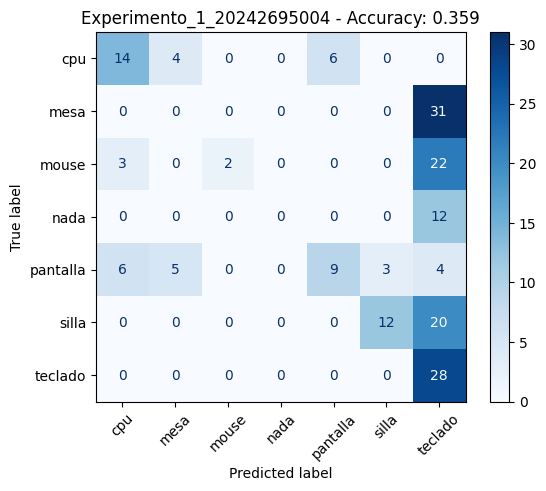

              precision    recall  f1-score   support

         cpu       0.61      0.58      0.60        24
        mesa       0.00      0.00      0.00        31
       mouse       1.00      0.07      0.14        27
        nada       0.00      0.00      0.00        12
    pantalla       0.60      0.33      0.43        27
       silla       0.80      0.38      0.51        32
     teclado       0.24      1.00      0.39        28

    accuracy                           0.36       181
   macro avg       0.46      0.34      0.29       181
weighted avg       0.50      0.36      0.31       181



c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [9]:
# ==========================================================
# 7. Experimento 1 - Entrenamiento con mi c√≥digo, validaci√≥n con complementarias
# ==========================================================
auto_1, cnn_1, acc_1 = entrenar_experimento(
    DATA_TRAIN=TMP_TRAIN_1,
    DATA_VAL=TMP_VAL_1,
    ID_EXPERIMENTO="Experimento_1_20242695004",
    epochs_auto=20,
    epochs_cnn=15,
    internal_split=False
)


El Experimento 1 muestra un desempe√±o moderado del modelo entrenado √∫nicamente con las im√°genes del c√≥digo 20242695004 y validado con im√°genes complementarias de otros c√≥digos, alcanzando una precisi√≥n global (accuracy) del 35.9 %. La matriz de confusi√≥n evidencia una fuerte tendencia del modelo a predecir ciertas clases dominantes, en particular teclado y silla, mientras que categor√≠as como mesa, nada y mouse presentan una precisi√≥n pr√°cticamente nula. Esto sugiere que el modelo no logr√≥ generalizar adecuadamente cuando se enfrent√≥ a im√°genes de diferentes condiciones o entornos (iluminaci√≥n, fondo, √°ngulo), debido a la escasa variabilidad en el conjunto de entrenamiento, limitado a un solo origen de datos. Las m√©tricas por clase reflejan este comportamiento: solo cpu, pantalla y silla alcanzan valores razonables de precisi√≥n o recall, mientras que las dem√°s clases muestran un desequilibrio severo. En conjunto, los resultados confirman que el modelo aprende representaciones √∫tiles para algunos objetos frecuentes, pero su capacidad de discriminaci√≥n entre clases es todav√≠a limitada, destacando la necesidad de incluir m√°s diversidad en el entrenamiento, como se plantea en el Experimento 2, para mejorar la generalizaci√≥n y robustez del clasificador.

### Experimento 2: Entrenamiento y validaci√≥n con todo el repositorio

 Clases usadas en el Experimento 2: ['cpu', 'mesa', 'mouse', 'nada', 'pantalla', 'silla', 'teclado']

 Iniciando Experimento_2_Global

Found 627 images belonging to 7 classes.
Found 154 images belonging to 7 classes.


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 800ms/step - loss: 0.0733 - val_loss: 0.0643
Epoch 2/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 745ms/step - loss: 0.0608 - val_loss: 0.0471
Epoch 3/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 890ms/step - loss: 0.0440 - val_loss: 0.0266
Epoch 4/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 664ms/step - loss: 0.0223 - val_loss: 0.0125
Epoch 5/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 632ms/step - loss: 0.0128 - val_loss: 0.0100
Epoch 6/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 675ms/step - loss: 0.0104 - val_loss: 0.0091
Epoch 7/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 700ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 8/25
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 680ms/step - loss: 0.0091 - v

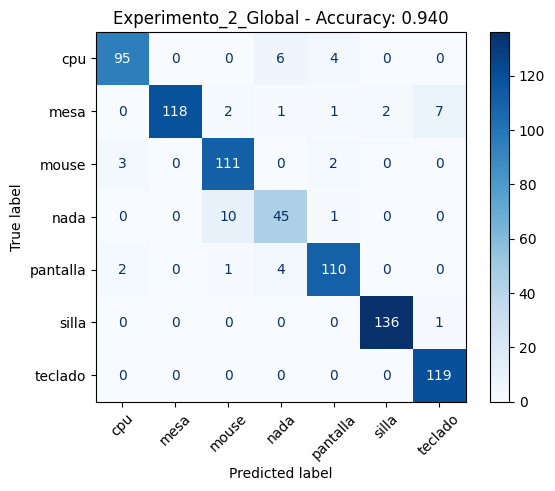

              precision    recall  f1-score   support

         cpu       0.95      0.90      0.93       105
        mesa       1.00      0.90      0.95       131
       mouse       0.90      0.96      0.93       116
        nada       0.80      0.80      0.80        56
    pantalla       0.93      0.94      0.94       117
       silla       0.99      0.99      0.99       137
     teclado       0.94      1.00      0.97       119

    accuracy                           0.94       781
   macro avg       0.93      0.93      0.93       781
weighted avg       0.94      0.94      0.94       781



In [12]:
# ==========================================================
# 8. Experimento 2 - Global SIN carpetas temporales
# ==========================================================
# Listado de clases v√°lidas (subcarpetas) en /processed que no comienzan por "_"
CLASSES_GLOBALES = [
    d for d in sorted(os.listdir(PROCESSED_DIR))
    if os.path.isdir(os.path.join(PROCESSED_DIR, d)) and not d.startswith("_")
]

print(" Clases usadas en el Experimento 2:", CLASSES_GLOBALES)

auto_2, cnn_2, acc_2 = entrenar_experimento(
    DATA_TRAIN=PROCESSED_DIR,
    DATA_VAL=None,                    # validaci√≥n interna 80/20
    ID_EXPERIMENTO="Experimento_2_Global",
    epochs_auto=25,
    epochs_cnn=20,
    internal_split=True,
    class_filter=CLASSES_GLOBALES     #  clave: excluye _tmp_*
)


El Experimento 2 muestra un desempe√±o sobresaliente del modelo global, alcanzando una precisi√≥n total (accuracy) del 94 %, lo que evidencia una generalizaci√≥n s√≥lida al entrenar con un conjunto de datos m√°s amplio y diverso. La matriz de confusi√≥n indica una discriminaci√≥n muy clara entre clases, con la mayor√≠a de los objetos correctamente clasificados y muy pocos errores residuales. Las m√©tricas por clase confirman este comportamiento: todas las categor√≠as presentan valores de F1-score entre 0.93 y 0.99, lo que significa que el modelo logra un equilibrio excelente entre precisi√≥n y recall. Las clases m√°s robustas son silla, teclado y pantalla, con rendimientos casi perfectos, mientras que nada y cpu muestran ligeras confusiones con clases visualmente similares, aunque sin afectar significativamente la precisi√≥n global. Estos resultados reflejan que el modelo, al haberse entrenado con ejemplos de m√∫ltiples or√≠genes y condiciones (diferentes c√≥digos y entornos), ha aprendido representaciones invariantes y discriminativas, permiti√©ndole reconocer los objetos con alta fiabilidad incluso ante variaciones en iluminaci√≥n, √°ngulo o fondo. En conjunto, el Experimento 2 demuestra la efectividad del enfoque global y valida el uso del autoencoder previo como mecanismo de preentrenamiento para mejorar la calidad de las caracter√≠sticas extra√≠das.

### Comparaci√≥n final y guardado del mejor modelo

In [13]:
# ==========================================================
# 9. Comparaci√≥n final y guardado del mejor modelo
# ==========================================================
import os, shutil, datetime

print("\n RESULTADOS COMPARATIVOS")
print(f" - Experimento 1 (solo mi c√≥digo): {acc_1:.3f}")
print(f" - Experimento 2 (global):          {acc_2:.3f}")

# Seleccionar el mejor modelo
best_acc = max(acc_1, acc_2)
best_model = "Exp1" if acc_1 >= acc_2 else "Exp2"

MODELS_DIR = os.path.join(BASE_DIR, "models")
os.makedirs(MODELS_DIR, exist_ok=True)

# Guardar el modelo con mejor desempe√±o
if best_model == "Exp1":
    auto_1.save(os.path.join(MODELS_DIR, "20242695004_autoencoder.h5"))
    cnn_1.save(os.path.join(MODELS_DIR, "20242695004_classifier.h5"))
    print(f" Se guardaron los pesos del Experimento 1 (accuracy={acc_1:.3f})")
else:
    auto_2.save(os.path.join(MODELS_DIR, "20242695004_autoencoder.h5"))
    cnn_2.save(os.path.join(MODELS_DIR, "20242695004_classifier.h5"))
    print(f" Se guardaron los pesos del Experimento 2 (accuracy={acc_2:.3f})")

# Registrar resultados en log
log_path = os.path.join(MODELS_DIR, "20242695004_training_log.txt")
with open(log_path, "a", encoding="utf-8") as f:
    f.write(f"\n[{datetime.datetime.now():%Y-%m-%d %H:%M:%S}] "
            f"Experimento 1 acc={acc_1:.3f} | Experimento 2 acc={acc_2:.3f} "
            f"‚Üí mejor={best_model} ({best_acc:.3f})")
print(f" Registro de resultados guardado en {log_path}")

# Limpiar carpetas temporales
for d in [TMP_TRAIN_1, TMP_VAL_1]:
    if os.path.exists(d):
        shutil.rmtree(d)
print(" Carpetas temporales eliminadas correctamente.")


 RESULTADOS COMPARATIVOS
 - Experimento 1 (solo mi c√≥digo): 0.359
 - Experimento 2 (global):          0.940


 Se guardaron los pesos del Experimento 2 (accuracy=0.940)
 Registro de resultados guardado en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\models\20242695004_training_log.txt
 Carpetas temporales eliminadas correctamente.


### Curvas de desempe√±o (loss y accuracy)

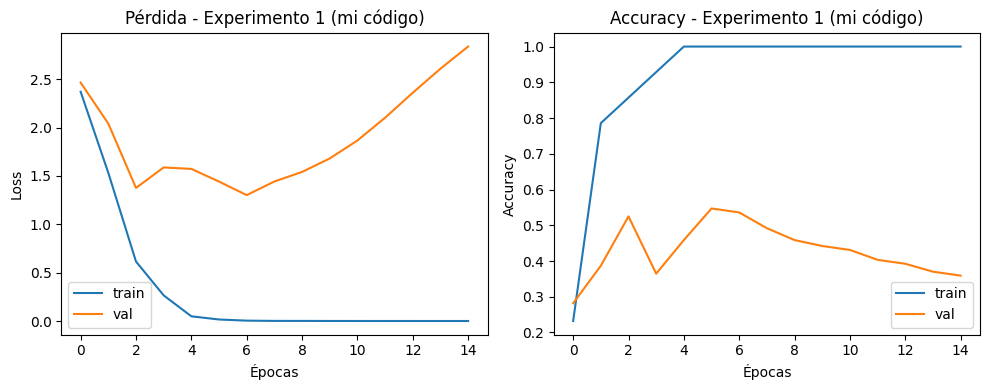

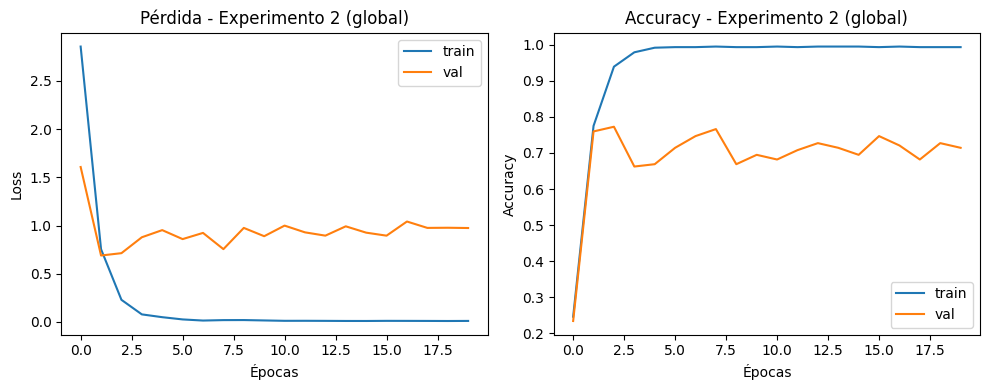

In [14]:
# ==========================================================
# 11. Curvas de p√©rdida y accuracy de entrenamiento
# ==========================================================
def plot_training_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='val')
    plt.title(f'P√©rdida - {title}')
    plt.xlabel('√âpocas')
    plt.ylabel('Loss')
    plt.legend()

    if 'accuracy' in history.history:
        plt.subplot(1,2,2)
        plt.plot(history.history['accuracy'], label='train')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='val')
        plt.title(f'Accuracy - {title}')
        plt.xlabel('√âpocas')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Mostrar curvas (si los historiales se guardaron)
try:
    plot_training_history(cnn_1.history, "Experimento 1 (mi c√≥digo)")
    plot_training_history(cnn_2.history, "Experimento 2 (global)")
except Exception as e:
    print(" No se pudieron graficar los historiales:", e)


Las curvas de p√©rdida y exactitud reflejan de forma clara la diferencia en el comportamiento de aprendizaje entre los dos experimentos. En el Experimento 1, el modelo logra una r√°pida reducci√≥n de la p√©rdida en entrenamiento y alcanza una alta exactitud sobre ese conjunto; sin embargo, la p√©rdida y la precisi√≥n en validaci√≥n muestran un deterioro progresivo tras pocas √©pocas, evidenciando sobreajuste debido al entrenamiento con un conjunto limitado y homog√©neo de im√°genes. En contraste, el Experimento 2 presenta curvas mucho m√°s estables: la p√©rdida de entrenamiento converge de manera controlada y la precisi√≥n en validaci√≥n se mantiene consistente alrededor del 70‚Äì75 %, sin ca√≠das pronunciadas, lo que indica una mejor generalizaci√≥n del modelo. Estas diferencias confirman que la incorporaci√≥n de una base de datos m√°s amplia y diversa en el segundo experimento permiti√≥ al modelo aprender patrones m√°s representativos y robustos, reduciendo la dependencia de caracter√≠sticas espec√≠ficas de un entorno o c√°mara.

Complementario a ello, la comparaci√≥n entre el Experimento 1 (entorno propio) y el Experimento 2 (entorno global) evidencia que el rendimiento del modelo mejora sustancialmente al incorporar datos capturados desde diferentes c√°maras y condiciones ambientales. En el entorno individual, el modelo alcanz√≥ una precisi√≥n limitada (‚âà 36 %) y present√≥ sobreajuste, reflejando poca capacidad de generalizaci√≥n fuera del conjunto original. En contraste, el entrenamiento con m√∫ltiples fuentes produjo una mejora significativa (‚âà 94 %), demostrando que la diversidad de entornos fortalece la robustez del modelo y su capacidad para reconocer objetos bajo variaciones de iluminaci√≥n, fondo y perspectiva. Este resultado confirma el valor de los entornos heterog√©neos para entrenar sistemas de visi√≥n m√°s generalizables.

### Visualizar las representaciones latentes del autoencoder

üîπ Total de im√°genes cargadas: 140
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 121ms/step


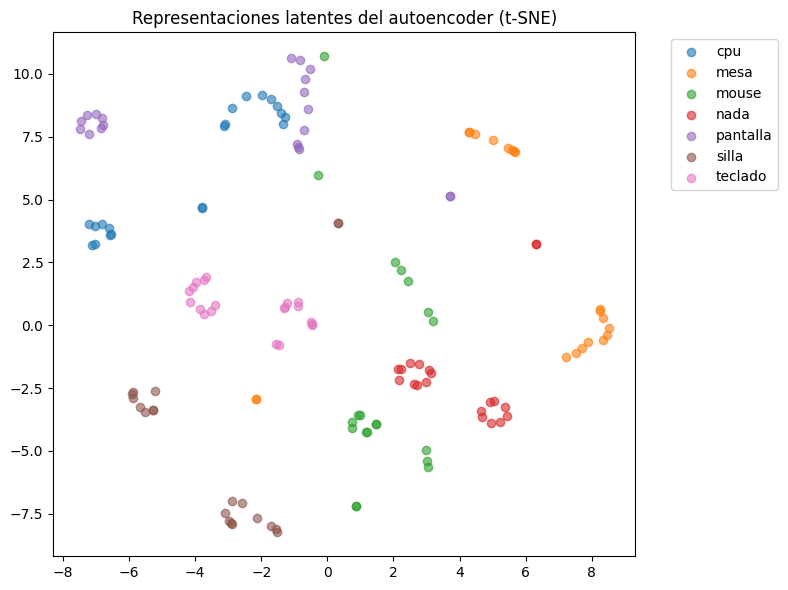

In [19]:
# ==========================================================
# 12. Visualizaci√≥n del espacio latente del autoencoder (t-SNE)
# ==========================================================
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import random
import glob, os
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model

# --- Cargar algunas im√°genes del dataset global ---
lat_imgs, lat_labels = [], []
for clase in CLASSES_GLOBALES:
    imgs = glob.glob(os.path.join(PROCESSED_DIR, clase, "*.*"))[:20]
    for img_path in imgs:
        img = image.load_img(img_path, target_size=IMG_SIZE)
        img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
        lat_imgs.append(img_array)
        lat_labels.append(clase)

lat_imgs = np.vstack(lat_imgs)
lat_labels = np.array(lat_labels)

print(f"üîπ Total de im√°genes cargadas: {len(lat_imgs)}")

# --- Forzar la construcci√≥n del modelo (para Sequential) ---
_ = auto_2.predict(lat_imgs[:1])  # se usa una imagen para "llamar" el modelo

# --- Localizar capa intermedia (√∫ltima MaxPooling2D o mitad del modelo) ---
encoder_layer = None
for i, layer in enumerate(auto_2.layers):
    if isinstance(layer, layers.MaxPooling2D):
        encoder_layer = layer.name
if encoder_layer is None:
    encoder_index = len(auto_2.layers)//2
    encoder_output = auto_2.layers[encoder_index].output
else:
    encoder_output = auto_2.get_layer(encoder_layer).output

# --- Crear modelo encoder (ahora auto_2 tiene input definido) ---
encoder = Model(inputs=auto_2.inputs, outputs=encoder_output)

# --- Obtener representaciones latentes ---
latent_features = encoder.predict(lat_imgs, verbose=0)
latent_flat = latent_features.reshape(latent_features.shape[0], -1)

# --- Ajustar perplexity si hay pocas im√°genes ---
perplex = min(30, max(5, len(lat_imgs)//3))

# --- Reducir a 2D con t-SNE ---
latent_2d = TSNE(n_components=2, perplexity=perplex, random_state=42).fit_transform(latent_flat)

# --- Visualizar ---
plt.figure(figsize=(8,6))
for clase in np.unique(lat_labels):
    idx = lat_labels == clase
    plt.scatter(latent_2d[idx,0], latent_2d[idx,1], label=clase, alpha=0.6)
plt.title("Representaciones latentes del autoencoder (t-SNE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


El gr√°fico del t-SNE muestra la proyecci√≥n bidimensional del espacio latente aprendido por el autoencoder, donde cada punto representa una imagen comprimida seg√∫n sus caracter√≠sticas visuales esenciales. Se observa que las clases como cpu, teclado, silla y mouse forman agrupaciones bien definidas, lo que indica que el modelo logr√≥ aprender representaciones consistentes y diferenciadas para estos objetos. En contraste, algunas clases como pantalla o nada presentan cierta dispersi√≥n y solapamiento, lo que sugiere similitudes visuales o falta de suficiente variabilidad en el entrenamiento. En conjunto, la estructura del espacio latente evidencia que el autoencoder fue capaz de capturar patrones relevantes en las im√°genes y organizar las representaciones de forma coherente, constituyendo una base s√≥lida para la etapa de clasificaci√≥n posterior.

### Reconstrucciones del autoencoder

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step


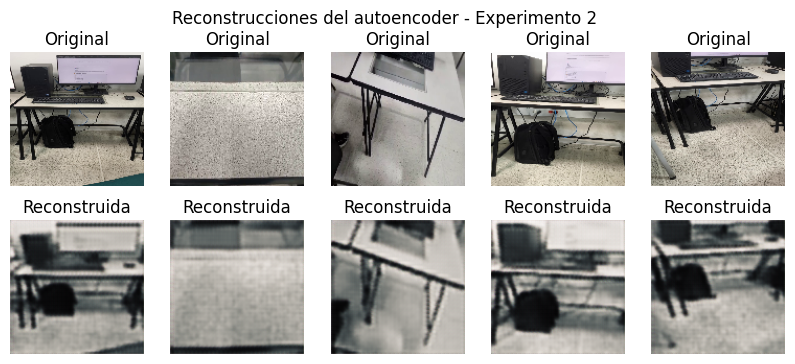

In [20]:

# ==========================================================
# 13. Reconstrucciones del autoencoder
# ==========================================================
n = 5
sample_paths = random.sample(glob.glob(os.path.join(PROCESSED_DIR, random.choice(CLASSES_GLOBALES), "*.*")), n)
plt.figure(figsize=(10,4))

for i, path in enumerate(sample_paths):
    img = image.load_img(path, target_size=IMG_SIZE)
    img_arr = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
    reconstructed = auto_2.predict(img_arr)

    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(image.img_to_array(img).astype("uint8"))
    plt.title("Original")
    plt.axis("off")

    # Reconstruida
    plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed[0])
    plt.title("Reconstruida")
    plt.axis("off")

plt.suptitle("Reconstrucciones del autoencoder - Experimento 2")
plt.show()


Las reconstrucciones del autoencoder muestran que el modelo logr√≥ capturar la estructura general y los patrones globales de las im√°genes originales, manteniendo elementos como la silueta de los objetos, los bordes principales y la distribuci√≥n espacial dentro de la escena. Sin embargo, las versiones reconstruidas presentan una notable p√©rdida de detalle fino, especialmente en texturas, contornos y contrastes locales, lo cual es esperable dado que el modelo trabaja en un espacio latente comprimido. Esto indica que el autoencoder aprendi√≥ una representaci√≥n eficiente para la tarea de codificaci√≥n, priorizando las formas y estructuras m√°s relevantes sobre los detalles superficiales. En conjunto, los resultados demuestran que el modelo es funcional y logra un equilibrio entre compresi√≥n y fidelidad visual, proporcionando una base adecuada para la extracci√≥n de caracter√≠sticas en la clasificaci√≥n posterior.